[View in Colaboratory](https://colab.research.google.com/github/Kaliostrogoblin/PDD/blob/master/examples/Metrics.ipynb)

# Visualization of the some metrics of the trained model

In this example we will show, how to evaluate the trained feature extractor and the KNN classifier based on it with the help of pdd functions.

## Cloning the repo

At first we will clone the repository.

In [12]:
!pip install -U -q PyDrive
!rm -r -f PDD
!git clone https://github.com/Kaliostrogoblin/PDD.git

Cloning into 'PDD'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 201 (delta 110), reused 129 (delta 47), pack-reused 0
Receiving objects: 100% (201/201), 53.26 MiB | 26.68 MiB/s, done.
Resolving deltas: 100% (110/110), done.


Change the directory to PDD to get access of helper functions and classes.

In [13]:
import os
os.chdir('PDD')
# verify if we are in correct directory
os.listdir()

['.git', 'pdd', 'server', 'examples', '.gitignore', 'README.md']

## Download the trained feature extractor from Google Drive

To do that one can use the prepared pdd utilites.

In [3]:
from pdd.utils.colab import download_file_from_gdrive
from pdd.utils.colab import upload_file_to_gdrive

file_id = 'your_file_id'
download_file_from_gdrive('pdd_feature_extractor.h5', file_id)

Using TensorFlow backend.


File `pdd_feature_extractor.h5` was successfully loaded


## Downloading the grape pdd dataset

We load it and split on train and test subdirectories in place. 

In [22]:
from pdd.utils.data_utils import create_dataset_from_dir
from pdd.datasets.grape import load_data

train_data_path, test_data_path = load_data(split_on_train_test=True, random_state=13)

print("Loading datasets...")
train_dataset = create_dataset_from_dir(train_data_path, shuffle=True)
test_dataset = create_dataset_from_dir(test_data_path, shuffle=True)

100%|██████████████████████| 5/5 [00:00<00:00, 49.76it/s]

Splitting on train and test...
Loading datasets...


## Build KNN classifier on the top of feature extractor

In [5]:
from pdd.models import TfKNN
from tensorflow.keras.models import load_model

from tensorflow.keras import backend as K
import tensorflow as tf

sess = tf.Session()
K.set_session(sess)

print("Loading feature extractor...")
feature_extractor = load_model("pdd_feature_extractor.h5")

tfknn = TfKNN(sess, 
              feature_extractor, 
              (train_dataset['data'], train_dataset['target']))

Loading feature extractor...


/usr/local/lib/python3.6/dist-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Getting keys from support set...
Took 2.69 seconds to run.

Freezing feature extractor graph...
INFO:tensorflow:Froze 52 variables.
INFO:tensorflow:Converted 52 variables to const ops.
Took 0.53 seconds to run.

Creating TfKNN graph...
Took 0.03 seconds to run.



## Now, let's plot some metrics:

- confusion matrix;
- incorrect predictions;
- tSNE embeddings.

In [0]:
from pdd.utils.metrics_vis import plot_incorrect_predictions
from pdd.utils.metrics_vis import plot_confusion_matrix
from pdd.utils.metrics_vis import plot_embeddings

### Confusion matrix

Making prediction for 43 images...
Took 2.68 seconds to run.



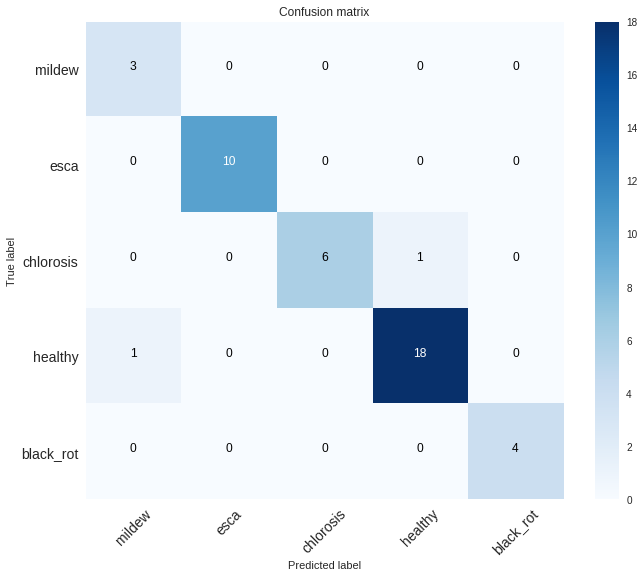

In [7]:
# lets print confusion matrix
preds = tfknn.predict(test_dataset['data'])
preds = preds[0][:, 0]
plot_confusion_matrix(y_true=test_dataset['target'], 
                      y_pred=preds,
                      target_names=test_dataset['target_names'],
                      savefig=True)

### Incorrect predictions

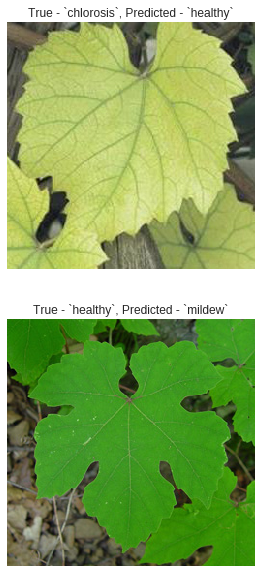

In [8]:
plot_incorrect_predictions(imgs=test_dataset['data'], 
                           y_true=test_dataset['target'],
                           y_pred=preds,
                           target_names=test_dataset['target_names'],
                           savefig=True)

### tSNE embeddings

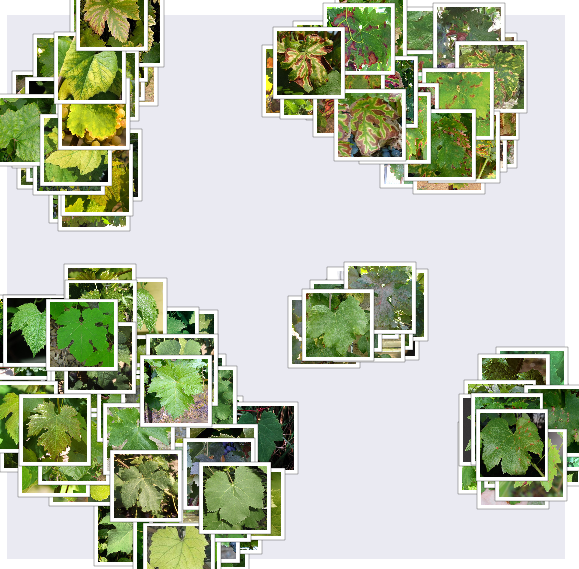

In [9]:
import numpy as np
# get the whole dataset including train and test
all_data = np.vstack([train_dataset['data'], test_dataset['data']])
all_labels = np.concatenate([train_dataset['target'], test_dataset['target']])
# rescale input to high-level feature extractor representation
all_data_rescaled = feature_extractor.predict(all_data)
# plot embeddings
plot_embeddings(X=all_data_rescaled,
                y=all_labels,
                X_origin=all_data,
                show_as_imgs=True,
                savefig=True)

## Upload plots to the Google Drive

In [0]:
files_to_upload = ('confusion_matrix.png', 'incorrect_preds.png', 'tsne.png')

for fname in files_to_upload:
    upload_file_to_gdrive(fname)